In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot  as plt
from matplotlib.ticker import PercentFormatter
import datetime as dt

In [2]:
#reading csv file
df_loan =pd.read_csv(r'D:\research work\course materials\Case study EDA\loan\loan.csv',low_memory=False)

In [3]:
#understanding the data and its datatype
df_loan.shape
df_loan.info()
df_loan.describe()
df_loan.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
#finding null values count
df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [5]:
#finding null values percentage
(df_loan.isnull().sum()/ df_loan.shape[0])*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [6]:
#counting the columns having all  null values
(df_loan.columns[df_loan.isnull().sum() == df_loan.shape[0]]).size

54

In [7]:
#finding the columns having all  null values
df_loan.columns[df_loan.isnull().sum() == df_loan.shape[0]]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [8]:
#drop the columns has all the null values
df_loan.drop(df_loan.columns[df_loan.isnull().sum() == df_loan.shape[0]],inplace = True,axis =1)

In [9]:
#finding the count of columns has only one unique column
df_loan.loc[:,df_loan.apply(pd.Series.nunique) == 1].shape[1]

9

In [10]:
# drop the columns which has only one unique value as it is not useful for further anlaysis
df_loan = df_loan.loc[:,df_loan.apply(pd.Series.nunique) != 1]


In [11]:
#finding whether any of the columns has more than 30% null values
df_loan.columns[((df_loan.isnull().sum()/ df_loan.shape[0])*100) >30]

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d'],
      dtype='object')

In [12]:
#drop the columns which has more than 30% null values
df_loan.drop(df_loan.columns[((df_loan.isnull().sum()/ df_loan.shape[0])*100) >30],inplace = True,axis =1)

In [13]:
#drorp zip code and url which are not useful for further anlaysis
df_loan.drop(labels = ["zip_code","url","emp_title","title",],axis =1,inplace=True) 

In [423]:
#check duplicate values in id column
any(df_loan.id.duplicated())

False

In [424]:
#check duplicate values in member_id column
any(df_loan.member_id.duplicated())

False

In [425]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [426]:
#remove other and none category from home_ownership and purpose which is not useful for analysis
df_loan = df_loan[~df_loan.home_ownership.isin(['OTHER','NONE'])]
df_loan = df_loan[~df_loan.purpose.isin(['other'])]

In [427]:
df_loan.shape

(35638, 40)

In [428]:
#convert the neccessary columns as categorical columns
categorical_columns = ['term','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state']
df_loan[categorical_columns] =df_loan[categorical_columns].apply(pd.Categorical)

In [429]:
#replace the 0 emp length as self_employed
df_loan.emp_length = df_loan.emp_length.cat.add_categories('Self-Employed')
df_loan.emp_length.fillna('Self-Employed',inplace=True)

In [430]:
#null values are imputed with 0 for public record bankrupties and revolving balance utilization rate column
df_loan["pub_rec_bankruptcies"].fillna(0.0, inplace=True)
df_loan["revol_util"].fillna(0.0, inplace=True)

In [431]:
#extract % symbol from int_rate column for further anlaysis
df_loan.rename({'int_rate':'int_rate(%)'},axis =1, inplace = True)
df_loan['int_rate(%)'] = df_loan['int_rate(%)'].apply(lambda x: str(x).split('%',1)).str[0]

In [432]:
#convert the necessary columns as numerical
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate(%)','annual_inc','dti']
df_loan[numeric_columns] =df_loan[numeric_columns].apply(pd.to_numeric)

In [433]:
#extract year and month from issue_d column for further analysis
df_loan['issuedmonth'],df_loan['issuedyear'] = df_loan['issue_d'].str.split('-', 1).str

In [434]:
#create range for loan_amount continous variable column for clear plotting
bins = [0, 5000, 10000, 15000, 20000, 25000,30000, 35000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000 and above']
df_loan['loan_amnt_range'] = pd.cut(df_loan['loan_amnt'], bins, labels=slot)

In [435]:
#create range for annual_inc_range continous variable column for clear plotting
bins = [0, 25000, 50000, 75000, 100000,200000,6000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-200000','200000 and above']
df_loan['annual_inc_range'] = pd.cut(df_loan['annual_inc'], bins, labels=slot)

In [436]:
#create range for open_acc_range continous variable column for clear plotting
bins = [0, 5,10,15,20,25,30,45]
slot = ['0-5', '5-10','10-15','15-20','20-25','25-30','30 and above']
df_loan['open_acc_range'] = pd.cut(df_loan['open_acc'], bins, labels=slot)

DTI plays vital role in calculating customer's credit score, keeping it under 40% is the general thumb rule. In dataset, maximum DTI is 29.99%, so it will not affect our analysis to find defaulters factors.

In [437]:
df_loan.dti.describe()

count    35638.000000
mean        13.434807
std          6.646067
min          0.000000
25%          8.350000
50%         13.510000
75%         18.670000
max         29.990000
Name: dti, dtype: float64

In [438]:
#create range for int_rate_range continous variable column for clear plotting
bins = [0, 7.5, 10, 12.5, 15,30]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df_loan['int_rate_range'] = pd.cut(df_loan['int_rate(%)'], bins, labels=slot)

In [439]:
#creating derived variable loan_income_ratio 
df_loan['loan_income_ratio']= df_loan['loan_amnt']/df_loan['annual_inc']

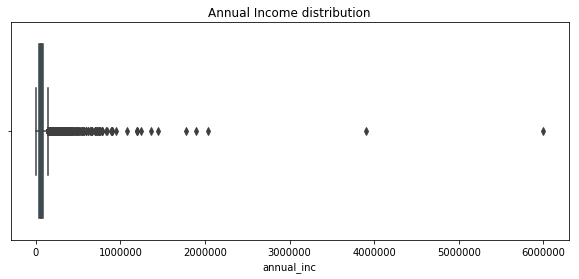

In [440]:
#Using boxplot to find annual_income  outliers, very few records after 3000000 USD
fig, ax=plt.subplots(1,1,figsize=(10,4))
#sns.distplot(df_loan['annual_inc'],ax=ax[0])
ax.set_title('Annual Income distribution')
ax.set_xlabel('Annula Income')
sns.boxplot(x=df_loan['annual_inc'],ax=ax)

In [441]:
#removing outliers from annual_inc column and analyse the column describtion which shows maximum
#annual income is 234996 USD.
ann_income_outlier=df_loan["annual_inc"].quantile(0.99)
df_loan = df_loan[df_loan["annual_inc"] < ann_income_outlier]
df_loan["annual_inc"].describe()

count     35277.000000
mean      66101.206409
std       35141.635799
min        4000.000000
25%       41000.000000
50%       60000.000000
75%       82000.000000
max      234996.000000
Name: annual_inc, dtype: float64

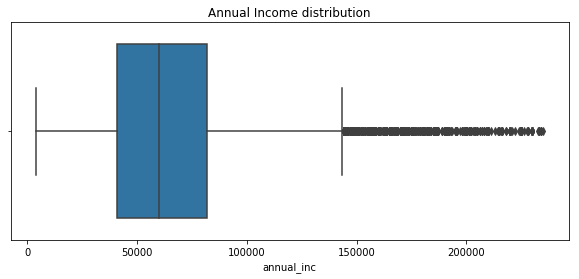

In [442]:
#After removing outliers,checking the annual income distribution once again 
fig, ax=plt.subplots(1,1,figsize=(10,4))
#sns.distplot(df_loan['annual_inc'],ax=ax[0])
ax.set_title('Annual Income distribution')
ax.set_xlabel('Annual Income')
sns.boxplot(x=df_loan['annual_inc'],ax=ax)

Loan got sanctioned for the people who has salary between 40000 USD to 85000 USD

In [443]:
df_loan.shape

(35277, 47)

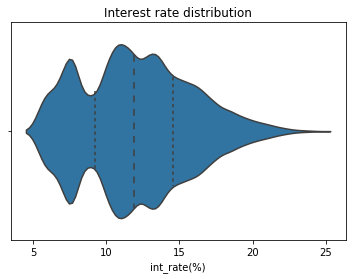

In [445]:
#Analysing all other continous variables distribution using violin plot. Interest rate 
#distribution is analysed.
fig, ax=plt.subplots(1,1,figsize=(6,4))
ax.set_title('Interest rate distribution')
sns.violinplot(data =df_loan, x='int_rate(%)',ax=ax, inner="quartile")

With Interest rate  between 10 to 15% most of the loans were given.

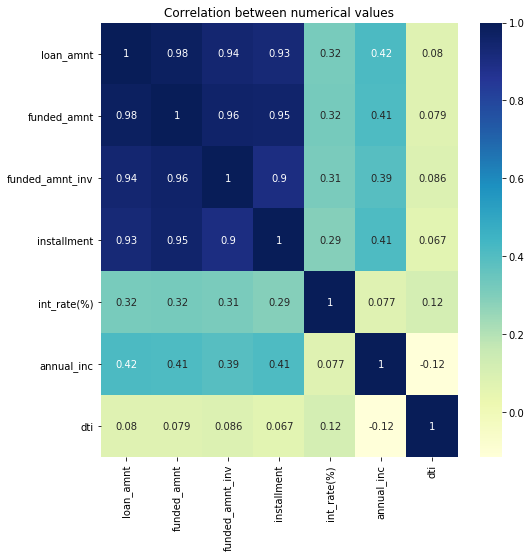

In [446]:
#showing the correlation between all continous variables to find which are the columns are positively
#correlated and which are the columns are negatively correalted
f, ax = plt.subplots(figsize=(8, 8))
df_corr =df_loan[numeric_columns]
df_corr = df_corr.corr()
sns.heatmap(df_corr , xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values,annot= True,cmap="YlGnBu")
plt.title('Correlation between numerical values')

plt.show()

Loan amount, funded amount, funded amount by investors are heavily interrelated. DTI is negatively correlated with all other variables. Its obvious if DTI is high, the chances of giving loan is less due to low annual income.


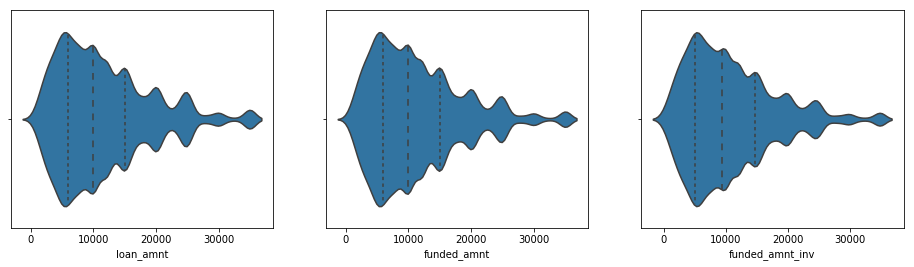

In [447]:
# Distribution of loan amount required by the customer, amount funded by company , and funded amount
#by the investors which are correlated each other.
fig, ax=plt.subplots(1,3,figsize=(16,4))

sns.violinplot(data =df_loan, x='loan_amnt',ax=ax[0], inner="quartile")
sns.violinplot(data =df_loan, x='funded_amnt',ax=ax[1], inner="quartile")
sns.violinplot(data =df_loan, x='funded_amnt_inv',ax=ax[2], inner="quartile")

Three absolute variables  loan amount, amount funded and total committed by investors are related to loan. As these variables are similarly distributed, there is an adequate balance between funding and credit. Between 5000 to 15000 the loan were issued more.

In [448]:
df_loan.to_csv(r'D:\research work\course materials\Case study EDA\loan\loan_dropped.csv',index=False)

In [450]:
#finding which purpose of loan gets sanctioned more %
(df_loan.purpose.value_counts()/len(df_loan)) *100

debt_consolidation    52.320209
credit_card           14.394648
home_improvement       8.189472
major_purchase         6.120135
small_business         5.065623
car                    4.365451
wedding                2.653287
medical                1.936106
moving                 1.632792
vacation               1.080024
house                  1.048842
educational            0.907107
renewable_energy       0.286306
Name: purpose, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

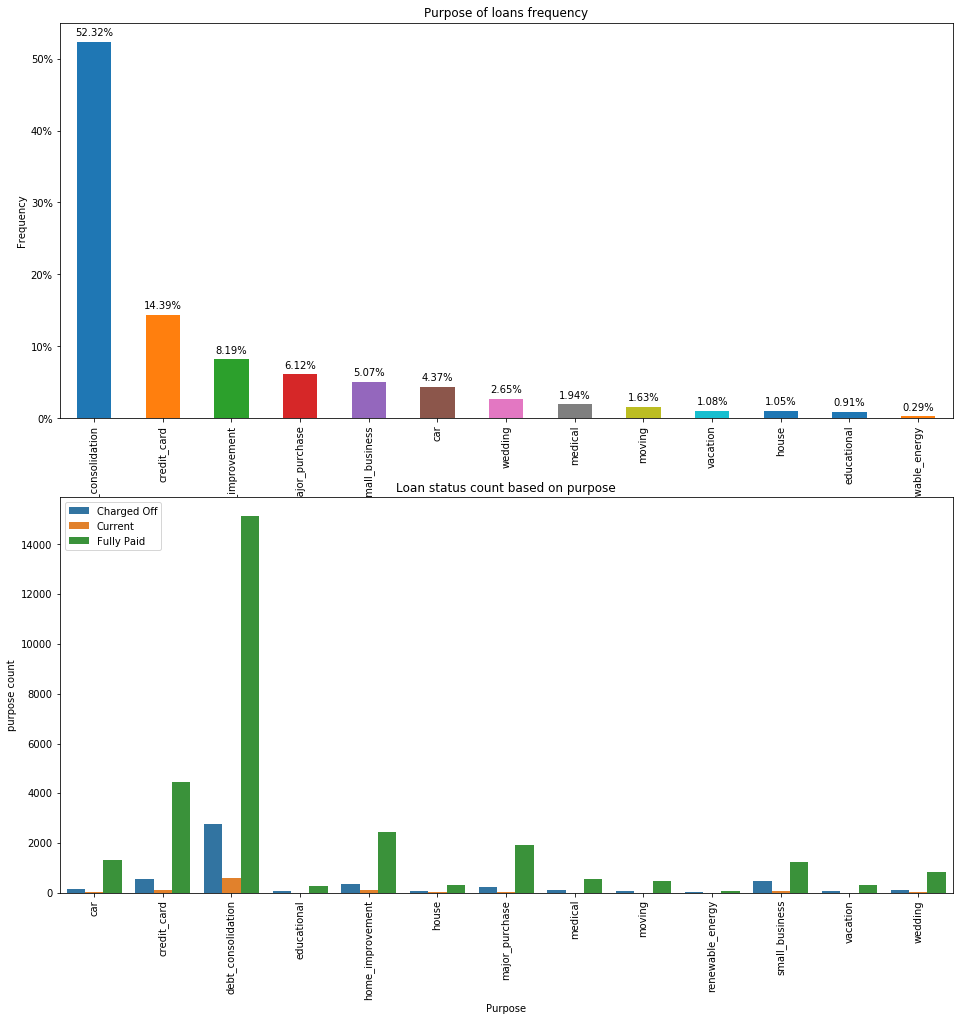

In [451]:
#plotting purpose of loans and analyse loan issuance % to different types of loans
figure = plt.figure(figsize=(16,16))
plt.subplot2grid((2,1),(0,0))
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.purpose.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Purpose of loans frequency')
plt.ylabel('Frequency')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    

#Couting loan status for each type of loans to find how much loans are charged off, fully paid or 
#currently loan is active.
plt.subplot2grid((2,2),(1,0),colspan =2)
ax =sns.countplot(x='purpose',hue='loan_status',data = df_loan)
plt.title('Loan status count based on purpose')
plt.ylabel('purpose count')
plt.xlabel("Purpose")
plt.legend(loc='upper left')
plt.xticks(rotation=90)



Highest % of loan issuance was for debt consolidation purpose around 52.19% which has high probability in promptness in paying back the loan amount, followed by credit card and home  improvements loans. Loan issued for the Purpose of Vacation, house, educational, renewable_energy were very less %. 

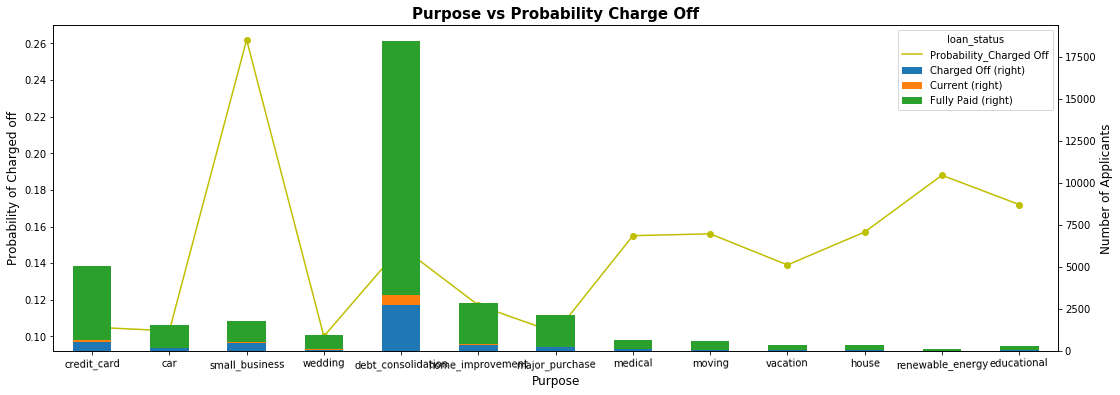

In [452]:
#The probability of 'chargedoff' customers amoung the total customers in each types of loan
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular loan
#category into its different 'loan status'(charged off,fullypaid, current).

crosstab = pd.crosstab(df_loan['purpose'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab[['Probability_Charged Off']]      
barPlot =  crosstab.iloc[:,0:3]
ax = linePlot.plot(figsize=(18,6), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked = True)
ax.set_title('Purpose vs Probability Charge Off',weight ='bold',fontsize=15)
ax.set_xlabel('Purpose',fontsize=12)

ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.savefig('LoanPurpose.png')
plt.show()


small business has more probability of charged off.

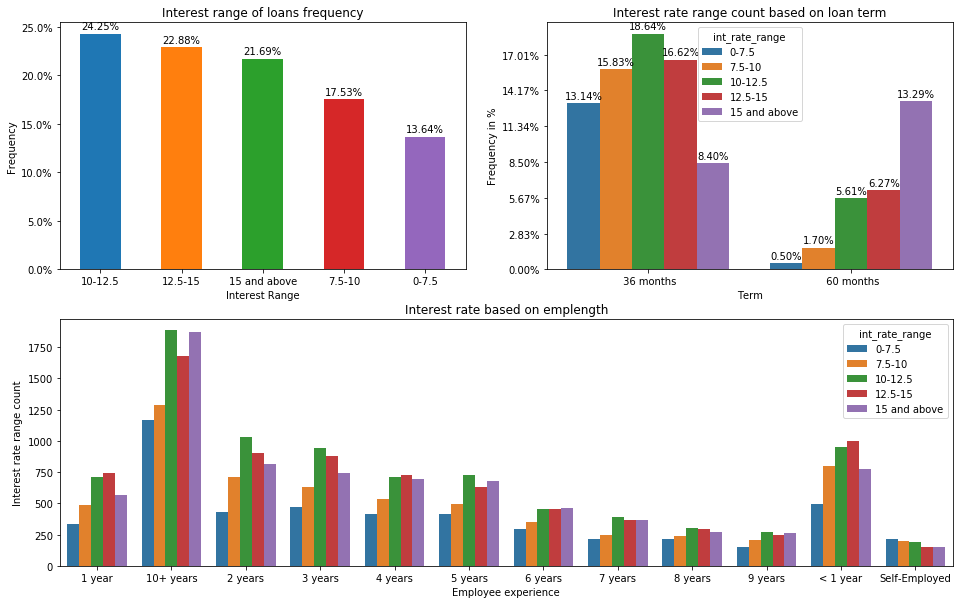

In [453]:
#Plotting the loan issuance % among each interest rate range
figure = plt.figure(figsize=(16,10))
plt.subplot2grid((2,2),(0,0))
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.int_rate_range.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Interest range of loans frequency')
plt.ylabel('Frequency')
plt.xlabel("Interest Range")
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    
    
#counting the number of loans issued for each range of interest rate based on employment
plt.subplot2grid((2,2),(1,0),colspan =2)
ax =sns.countplot(x='emp_length', hue ='int_rate_range', data = df_loan)
#ax =df_loan.loan_status.value_counts(normalize =True).plot(kind='bar')

plt.title('Interest rate based on emplength')
plt.ylabel('Interest rate range count')
plt.xlabel('Employee experience')    

#counting the number of loans issued for each range of interest rate based on term
plt.subplot2grid((2,2),(0,1))
ax =sns.countplot(x='term', hue ='int_rate_range', data = df_loan)
#ax =df_loan.loan_status.value_counts(normalize =True).plot(kind='bar')
plt.title('Interest rate range count based on loan term')
plt.ylabel('Frequency in %')
plt.xlabel('Term')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))   
ax.set_yticklabels(map('{:1.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/len(df_loan)))

for bar in ax.patches:
    height = bar.get_height()
    height =np.nan_to_num(height)
    label_position = float(height + (y_height * 0.01))     
    ax.text(float(bar.get_x() + bar.get_width()/2.), label_position,'{:1.2f}%'.format((height/len(df_loan))*100),ha='center', va='bottom') 

1. Loan issued was high in the interest range of 10-12.5%. 
2. More 36 months term loans were issued with low interest where as 60 months term loan were issued with high interest rate.
3. most of the loans issued with interest rate 10-12.5 range. but for emp length 1 year and <1 year got loans with interest rate 12.5-15 range


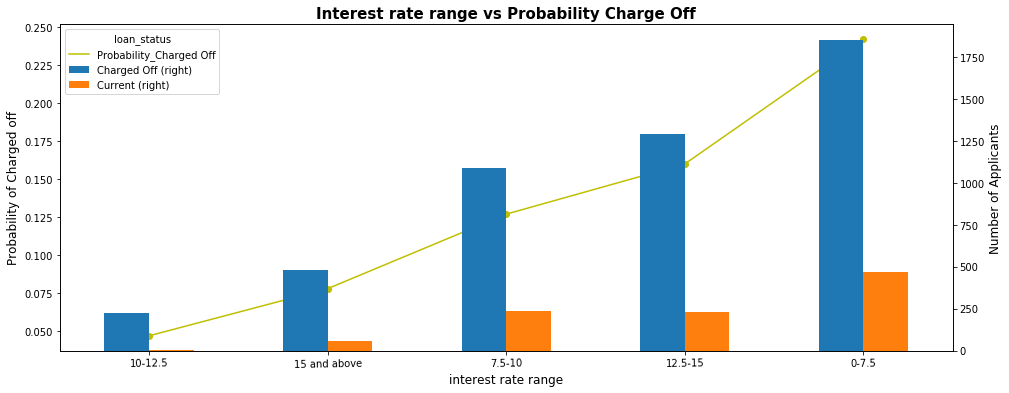

In [454]:
#The probability of 'chargedoff' customers amoung the total customers in each range of interest 
#rate is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular interest
#rate into its different 'loan status'(charged off,fullypaid, current). 
crosstab = pd.crosstab(df_loan['int_rate_range'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab[['Probability_Charged Off']]      
barPlot =  crosstab.iloc[:,0:2]
ax = linePlot.plot(figsize=(16,6), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True)
ax.set_title('Interest rate range vs Probability Charge Off',fontsize=15,weight="bold")
ax.set_xlabel('interest rate range',fontsize=12)
plt.xticks(rotation = 90)
ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.show()

Probability charged off is more in the range of 0-7.5 % interest rate.

Text(0.5,0,'Emp length')

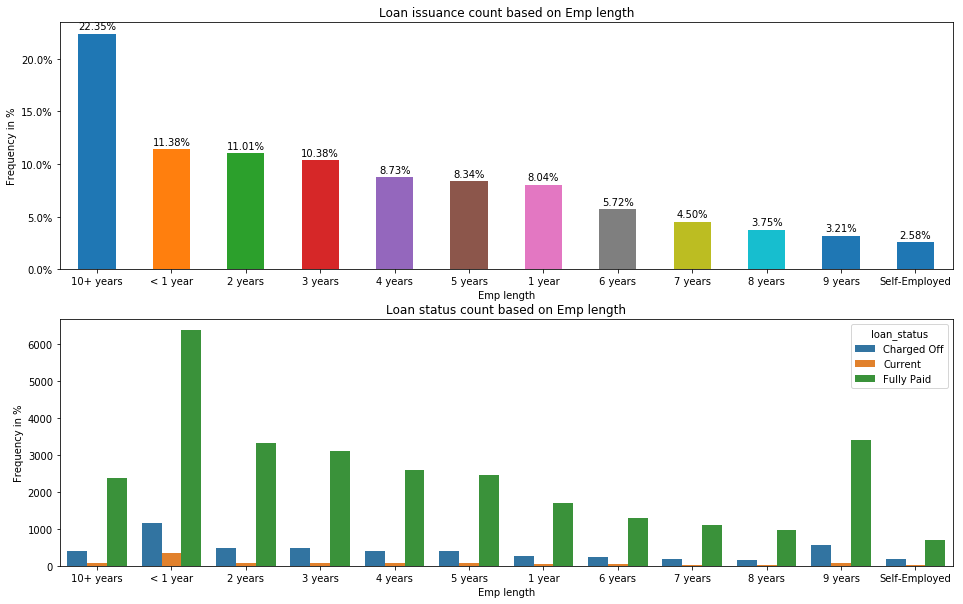

In [455]:
#plotting loan issuance % for each employment 
figure = plt.figure(figsize=(16,10))
plt.subplot2grid((2,1),(0,0))
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.emp_length.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan issuance count based on Emp length')
plt.ylabel('Frequency in %')
plt.xlabel('Emp length')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    

#counting the loan status count for each employment
plt.subplot2grid((2,1),(1,0))

ax =sns.countplot(x='emp_length', hue ='loan_status', data = df_loan)
ax =df_loan.emp_length.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan status count based on Emp length')
plt.ylabel('Frequency in %')
plt.xlabel('Emp length')

1) One strange finding is that 2nd highest % of loan given for the person who has less than 1 year emp_length which we cant see in indian perspective. this would have become a possibility because the banking company beleive on the continuity of the employment. 
2) less than 1 year persons have paid loan fully is in high ratio.

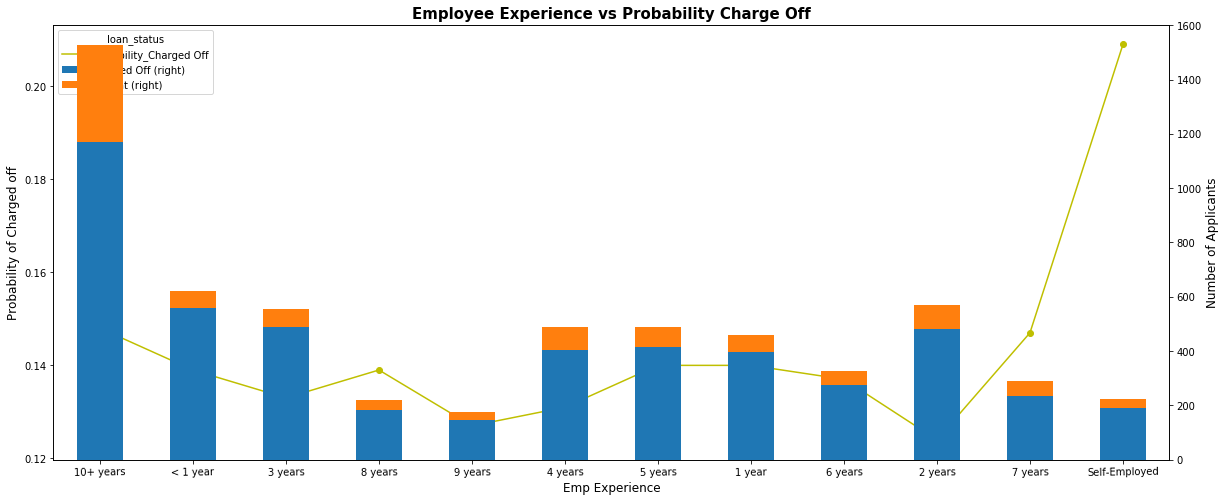

In [456]:
#The probability of 'chargedoff' customers amoung the total customers in each employment
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular employment
# into its different 'loan status'(charged off,fullypaid, current). 
crosstab = pd.crosstab(df_loan['emp_length'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab[['Probability_Charged Off']]      
barPlot =  crosstab.iloc[:,0:2]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('Employee Experience vs Probability Charge Off',fontsize=15,weight="bold")
ax.set_xlabel('Emp Experience',fontsize=12)
plt.xticks(rotation = 90)
ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.show()

self employment has more probability of charged off. 

In [457]:
(df_loan.loan_status.value_counts()/len(df_loan)) *100

Fully Paid     83.164668
Charged Off    14.000624
Current         2.834708
Name: loan_status, dtype: float64

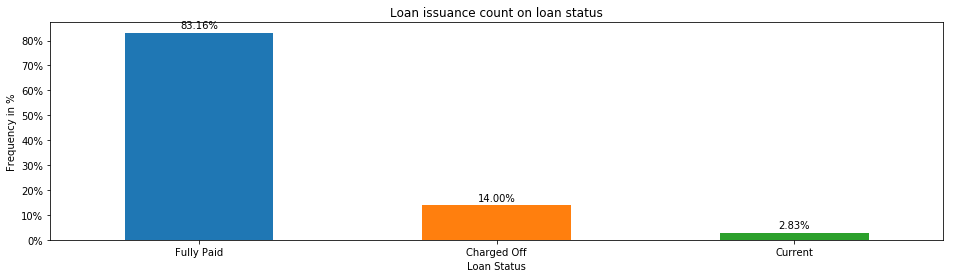

In [458]:
#counting each category of loan status of total issed loan
figure = plt.figure(figsize=(16,4))
plt.subplot2grid((1,1),(0,0))
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.loan_status.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan issuance count on loan status')
plt.ylabel('Frequency in %')
plt.xlabel('Loan Status')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    



The total % of charged off status is 14% in this dataset

In [459]:
df_loan.groupby(by= 'issuedyear')['id'].count()

issuedyear
07      206
08     1323
09     4025
10    10130
11    19593
Name: id, dtype: int64

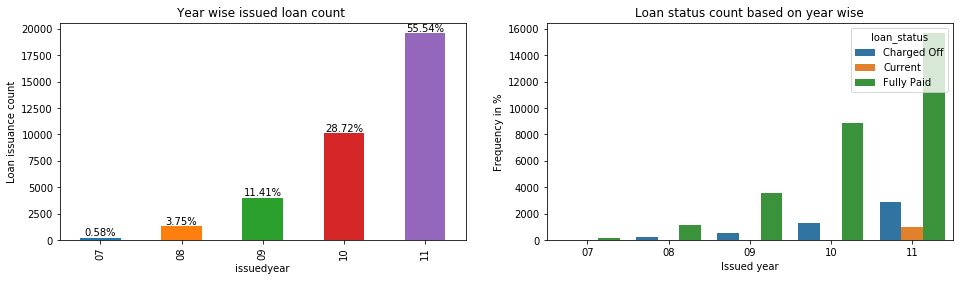

In [460]:
#counting the loan issuance for each year
figure = plt.figure(figsize= (16,4))
ax=plt.subplot2grid((1,2),(0,0))
year_wise =df_loan.groupby(by= 'issuedyear')['id'].count()
plt.xticks(rotation =0)
plt.xticks(rotation=90)
plt.title('Year wise issued loan count ')
plt.ylabel('Loan issuance count')
plt.xlabel('Year')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
year_wise.plot(kind='bar',ax = ax)
for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    height =  height/len(df_loan)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')  
    
#counting the each category of loan status for every year
ax=plt.subplot2grid((1,2),(0,1))    
ax =sns.countplot(x='issuedyear', hue ='loan_status', data = df_loan)
#ax =df_loan.emp_length.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan status count based on year wise')
plt.ylabel('Frequency in %')
plt.xlabel('Issued year')    
plt.show()

The rate of increase in loan issuance from 2007 to 2011 as raised 9469% approximately.
From 2007 to 2011 loan issuance is increased more and charged off is decreased considerably.


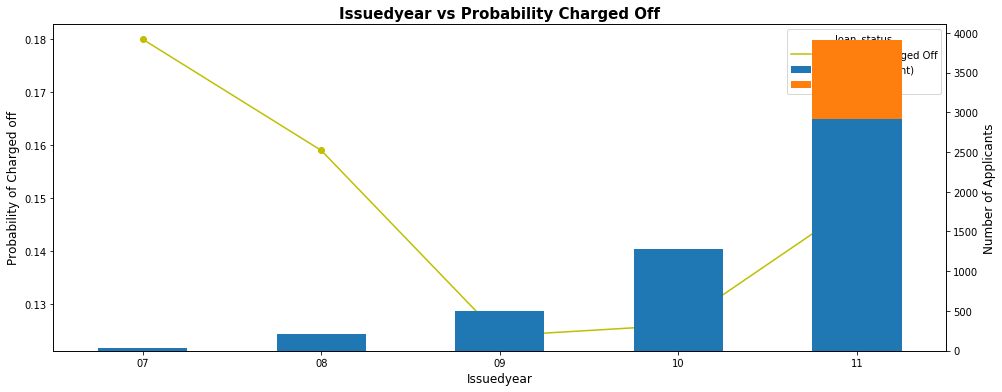

In [461]:
#The probability of 'chargedoff' customers amoung the total customers in each year
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of each year
# into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['issuedyear'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab[['Probability_Charged Off']]      
barPlot =  crosstab.iloc[:,0:2]
ax = linePlot.plot(figsize=(16,6), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('Issuedyear vs Probability Charged Off',fontsize=15,weight="bold")
ax.set_xlabel('Issuedyear',fontsize=12)
plt.xticks(rotation = 90)
ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.show()

The defaulters probability is 0.180 in 2007 where as in 2011 the defaulters probability is reduced to  0.149

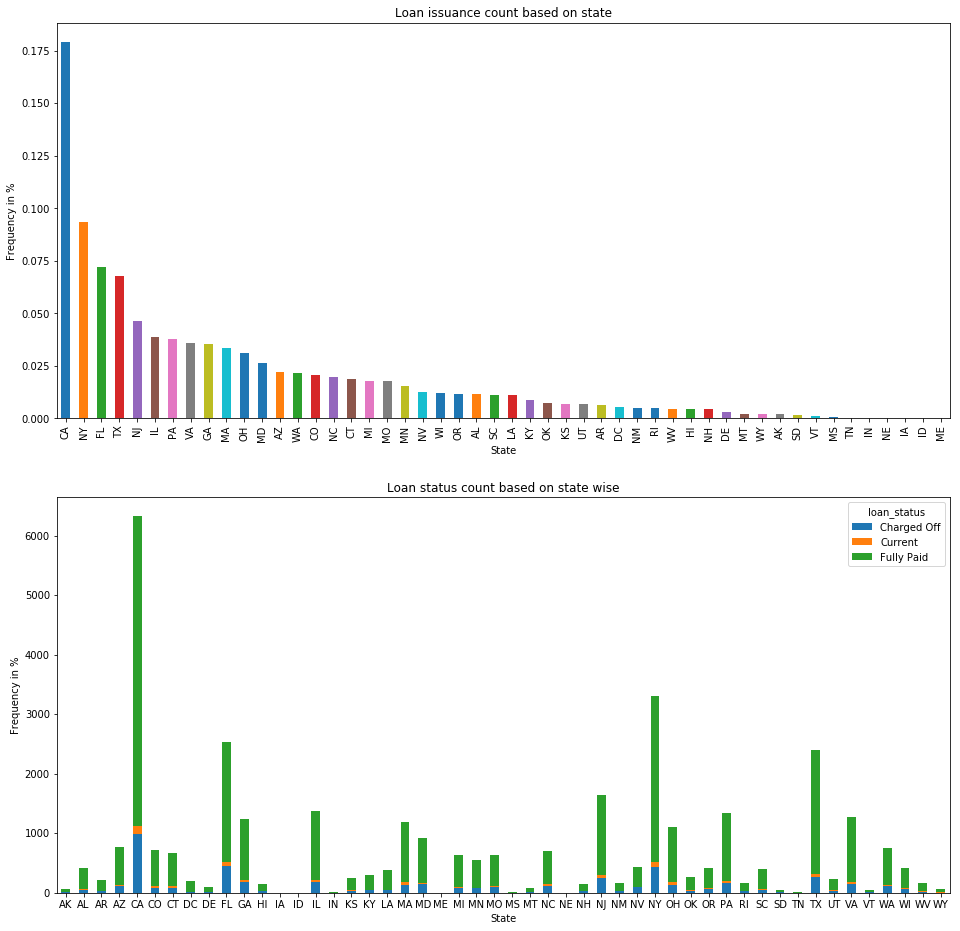

In [377]:
#counting the loan issuance for each state
figure = plt.figure(figsize= (16,16))
plt.subplot2grid((2,1),(0,0))
ax =df_loan.addr_state.value_counts(normalize =True).plot(kind='bar')
plt.xlabel('State')
plt.title('Loan issuance count based on state')
plt.ylabel('Frequency in %')

#counting each category of loan status for each state
ax=plt.subplot2grid((2,1),(1,0))    
ax =df_loan.groupby(['addr_state', 'loan_status']).size().unstack().plot(kind='bar', stacked=True,ax=ax)
#ax =sns.countplot(x='addr_state', hue ='loan_status', data = df_loan)
#ax =df_loan.emp_length.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan status count based on state wise')
plt.ylabel('Frequency in %')
plt.xlabel('State')    
plt.show()

CA is the highest loan issuance state followed by NY,FL,TX.

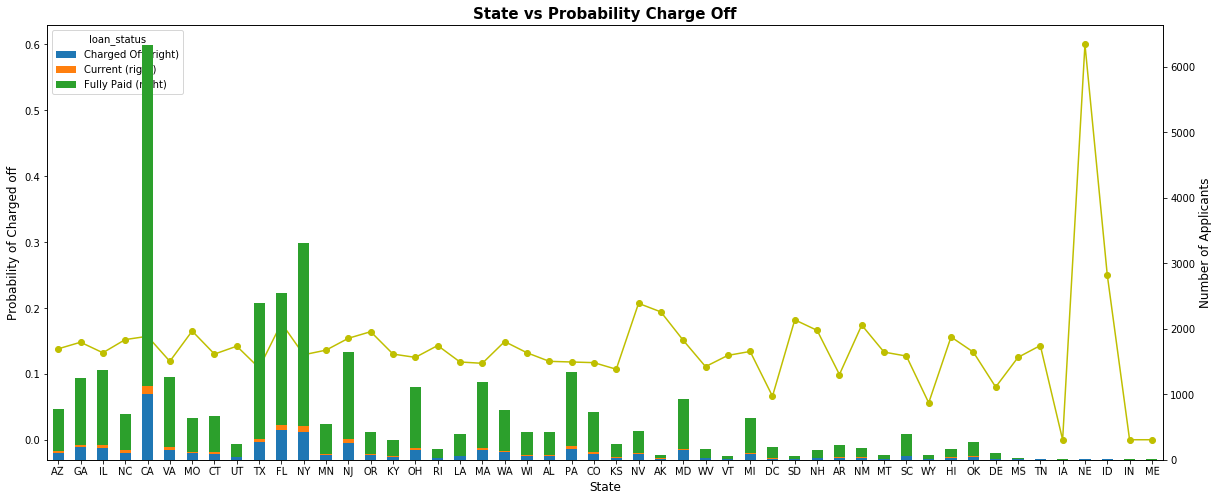

In [378]:
#The probability of 'chargedoff' customers amoung the total customers in each state
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular state
# into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['addr_state'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab['Probability_Charged Off']      
barPlot =  crosstab.iloc[:,0:3]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked =True)
ax.set_title('State vs Probability Charge Off',weight="bold", fontsize =15)
ax.set_xlabel('State',fontsize =12)
ax.set_ylabel('Probability of Charged off',fontsize =12)
ax2.set_ylabel('Number of Applicants',fontsize =12)
plt.show()

Although High Probability charging off  is observed in NE state the total of only 5 loans is provided. Thus by ignoring these observations  it is  NV state which is to be noted with  probability of defaulters  (0.207) compare to other states

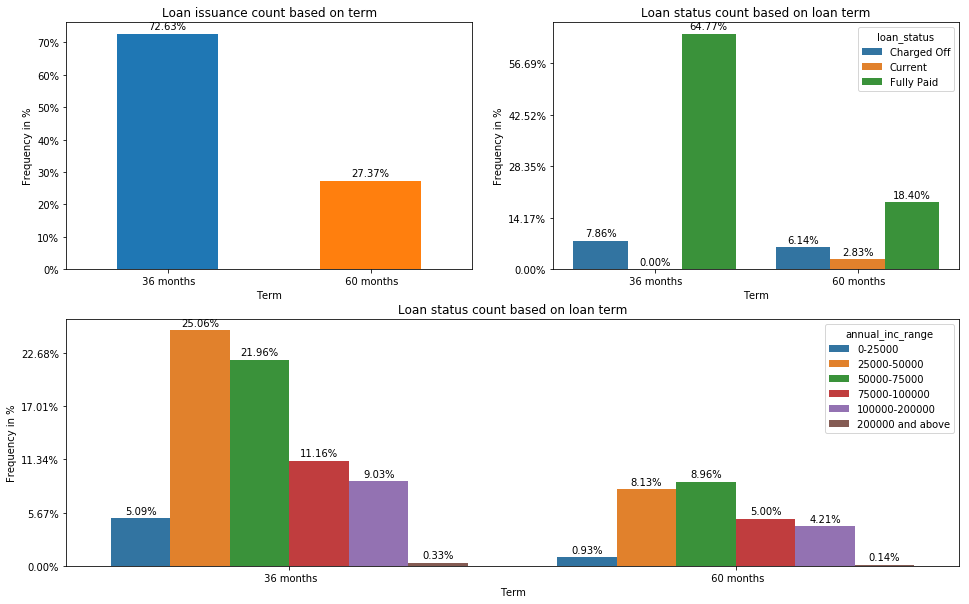

In [383]:
#counting loan issuance count based on each term
figure = plt.figure(figsize=(16,10))
plt.subplot2grid((2,2),(0,0))
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.term.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan issuance count based on term')
plt.ylabel('Frequency in %')
plt.xlabel('Term')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    

#counting each category of loan status based on term
plt.subplot2grid((2,2),(0,1))
ax =sns.countplot(x='term', hue ='loan_status', data = df_loan)
#ax =df_loan.loan_status.value_counts(normalize =True).plot(kind='bar')
plt.title('Loan status count based on loan term')
plt.ylabel('Frequency in %')
plt.xlabel('Term')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))   
ax.set_yticklabels(map('{:1.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/len(df_loan)))

for bar in ax.patches:
    height = bar.get_height()
    height =np.nan_to_num(height)
    label_position = float(height + (y_height * 0.01))     
    ax.text(float(bar.get_x() + bar.get_width()/2.), label_position,'{:1.2f}%'.format((height/len(df_loan))*100),ha='center', va='bottom') 
    
#counting total number of loan issuance for each term and each range of annual income
plt.subplot2grid((2,2),(1,0),colspan =2)
ax =sns.countplot(x='term', hue ='annual_inc_range', data = df_loan)
#ax =df_loan.loan_status.value_counts(normalize =True).plot(kind='bar')
plt.title('Loan status count based on loan term')
plt.ylabel('Frequency in %')
plt.xlabel('Term')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))   
ax.set_yticklabels(map('{:1.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/len(df_loan)))

for bar in ax.patches:
    height = bar.get_height()
    height =np.nan_to_num(height)
    label_position = float(height + (y_height * 0.01))     
    ax.text(float(bar.get_x() + bar.get_width()/2.), label_position,'{:1.2f}%'.format((height/len(df_loan))*100),ha='center', va='bottom')     

36 months term loan were issued more about 73%.  25000-50000 range of salaried employee got more loans with less interest rate.

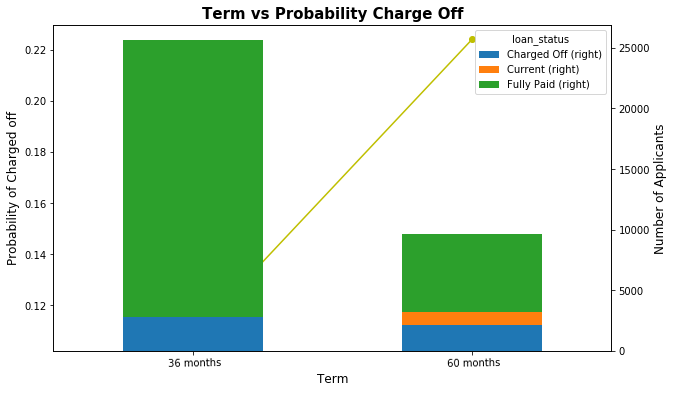

In [384]:
#The probability of 'chargedoff' customers amoung the total customers in each terms
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular term
# into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['term'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab['Probability_Charged Off']      
barPlot =  crosstab.iloc[:,0:3]
ax = linePlot.plot(figsize=(10,6), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked =True)
ax.set_title('Term vs Probability Charge Off',weight="bold", fontsize =15)
ax.set_xlabel('Term',fontsize =12)
ax.set_ylabel('Probability of Charged off',fontsize =12)
ax2.set_ylabel('Number of Applicants',fontsize =12)
plt.show()

60 months term loans has more probability of charged off. thats why LC charging more interest rate for 60 months term loans.

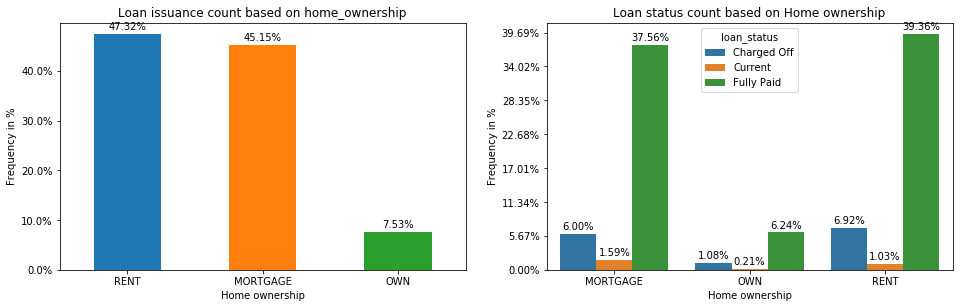

In [385]:
#counting loan issuance based on home ownership category
figure = plt.figure(figsize=(16,10))
plt.subplot2grid((2,2),(0,0))
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.home_ownership.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan issuance count based on home_ownership')
plt.ylabel('Frequency in %')
plt.xlabel('Home ownership')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    

#counting each category of loan status for each homeownership category
plt.subplot2grid((2,2),(0,1))
ax =sns.countplot(x='home_ownership', hue ='loan_status', data = df_loan)
#ax =df_loan.loan_status.value_counts(normalize =True).plot(kind='bar')
plt.title('Loan status count based on Home ownership')
plt.ylabel('Frequency in %')
plt.xlabel('Home ownership')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))   
ax.set_yticklabels(map('{:1.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/len(df_loan)))

for bar in ax.patches:
    height = bar.get_height()
    height =np.nan_to_num(height)
    label_position = float(height + (y_height * 0.01))     
    ax.text(float(bar.get_x() + bar.get_width()/2.), label_position,'{:1.2f}%'.format((height/len(df_loan))*100),ha='center', va='bottom') 
    

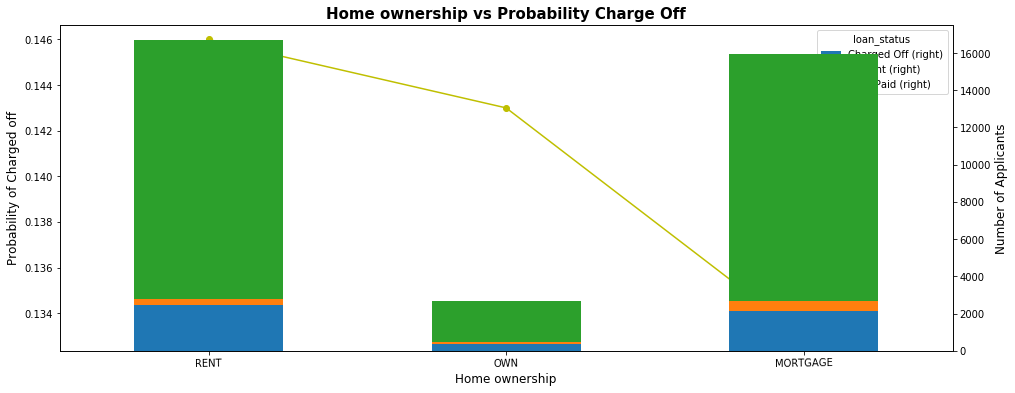

In [386]:
#The probability of 'chargedoff' customers amoung the total customers in each types of home ownership
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular home ownership
#category into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['home_ownership'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab['Probability_Charged Off']      
barPlot =  crosstab.iloc[:,0:3]
ax = linePlot.plot(figsize=(16,6), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked =True)
ax.set_title('Home ownership vs Probability Charge Off',weight="bold", fontsize =15)
ax.set_xlabel('Home ownership',fontsize =12)
ax.set_ylabel('Probability of Charged off',fontsize =12)
ax2.set_ylabel('Number of Applicants',fontsize =12)

plt.show()

Customers living in Rented house are high probability of defaulters.

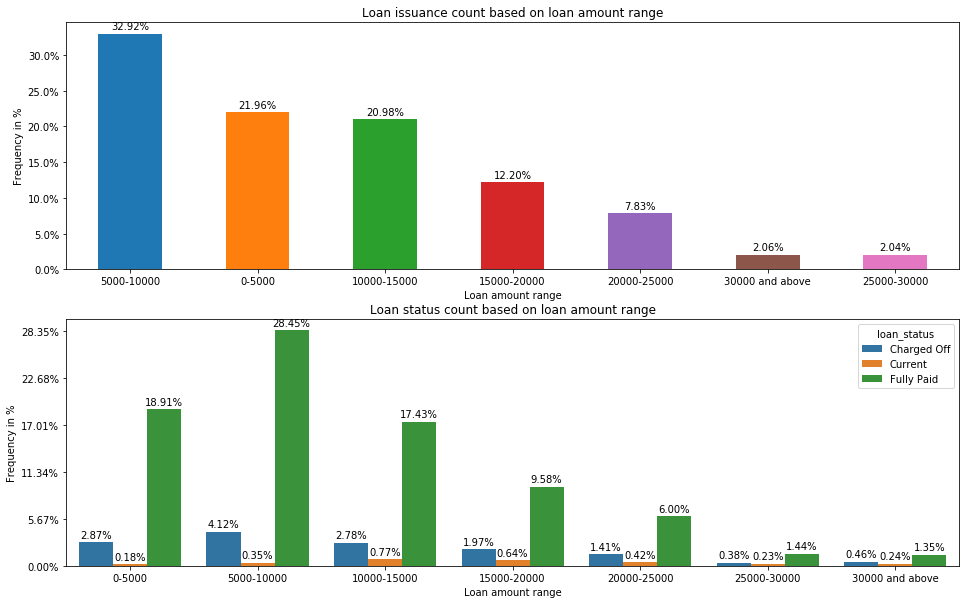

In [387]:
#counting loan issance for each range of loan amount
figure = plt.figure(figsize=(16,10))
plt.subplot2grid((2,2),(0,0),colspan =2)
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.loan_amnt_range.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan issuance count based on loan amount range')
plt.xlabel('Loan amount range')
plt.ylabel('Frequency in %')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    

#counting loan status category for each range of loan amount
plt.subplot2grid((2,2),(1,0),colspan =2)
ax =sns.countplot(x='loan_amnt_range', hue ='loan_status', data = df_loan)
#ax =df_loan.loan_status.value_counts(normalize =True).plot(kind='bar')
plt.title('Loan status count based on loan amount range')
plt.ylabel('Frequency in %')
plt.xlabel('Loan amount range')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))   
ax.set_yticklabels(map('{:1.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/len(df_loan)))

for bar in ax.patches:
    height = bar.get_height()
    height =np.nan_to_num(height)
    label_position = float(height + (y_height * 0.01))     
    ax.text(float(bar.get_x() + bar.get_width()/2.), label_position,'{:1.2f}%'.format((height/len(df_loan))*100),ha='center', va='bottom') 
    



Maximum loans issued in th range os 5000-1000USD

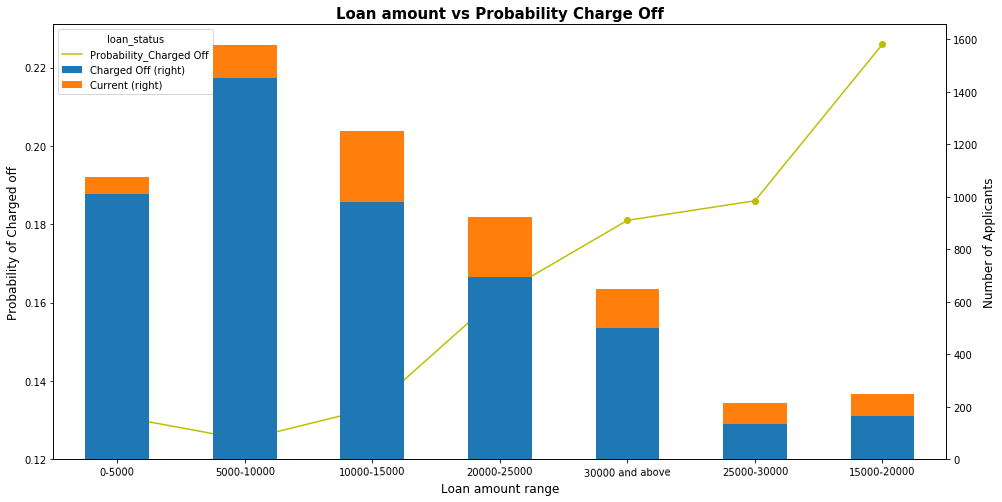

In [388]:
#The probability of 'chargedoff' customers amoung the total customers in each range of loan amount
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular range of loan amount
# into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['loan_amnt_range'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab[['Probability_Charged Off']]      
barPlot =  crosstab.iloc[:,0:2]
ax = linePlot.plot(figsize=(16,8), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('Loan amount vs Probability Charge Off',fontsize=15,weight="bold")
ax.set_xlabel('Loan amount range',fontsize=12)
plt.xticks(rotation = 90)
ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.show()

More defaulters are observed for loan amount between 15000-20000 USD

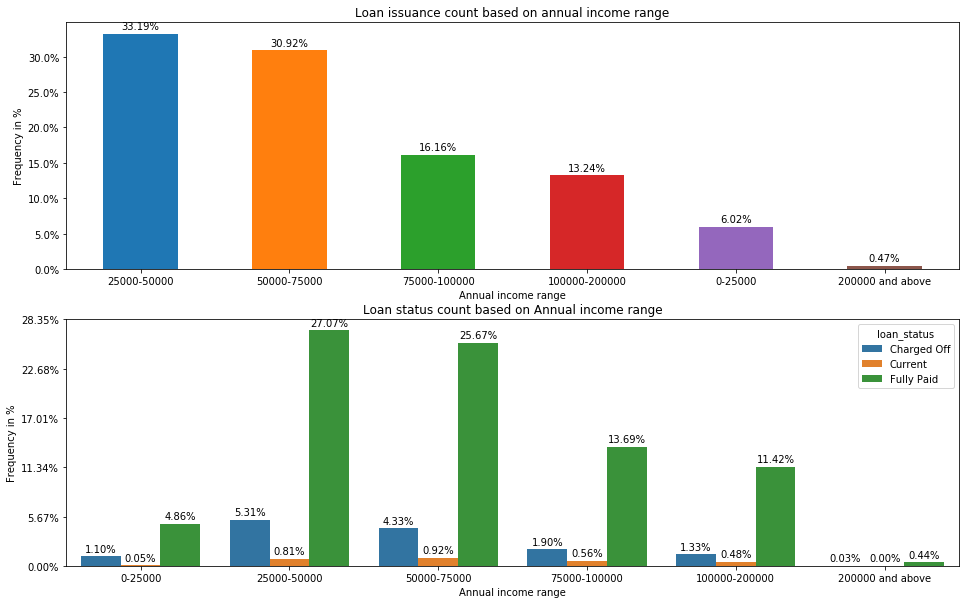

In [389]:
#counting loan issuance count for each range of annual income
figure = plt.figure(figsize=(16,10))
plt.subplot2grid((2,2),(0,0),colspan = 2)
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.annual_inc_range.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan issuance count based on annual income range')
plt.xlabel('Annual income range')
plt.ylabel('Frequency in %')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    

#counting loan status category for each range of annual income
plt.subplot2grid((2,2),(1,0),colspan =2)
ax =sns.countplot(x='annual_inc_range', hue ='loan_status', data = df_loan)
#ax =df_loan.loan_status.value_counts(normalize =True).plot(kind='bar')
plt.title('Loan status count based on Annual income range')
plt.ylabel('Frequency in %')
plt.xlabel('Annual income range')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))   
ax.set_yticklabels(map('{:1.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/len(df_loan)))

for bar in ax.patches:
    height = bar.get_height()
    height =np.nan_to_num(height)
    label_position = float(height + (y_height * 0.01))     
    ax.text(float(bar.get_x() + bar.get_width()/2.), label_position,'{:1.2f}%'.format((height/len(df_loan))*100),ha='center', va='bottom') 
    


Most defaulters observed for salary between 25000-50000 USD

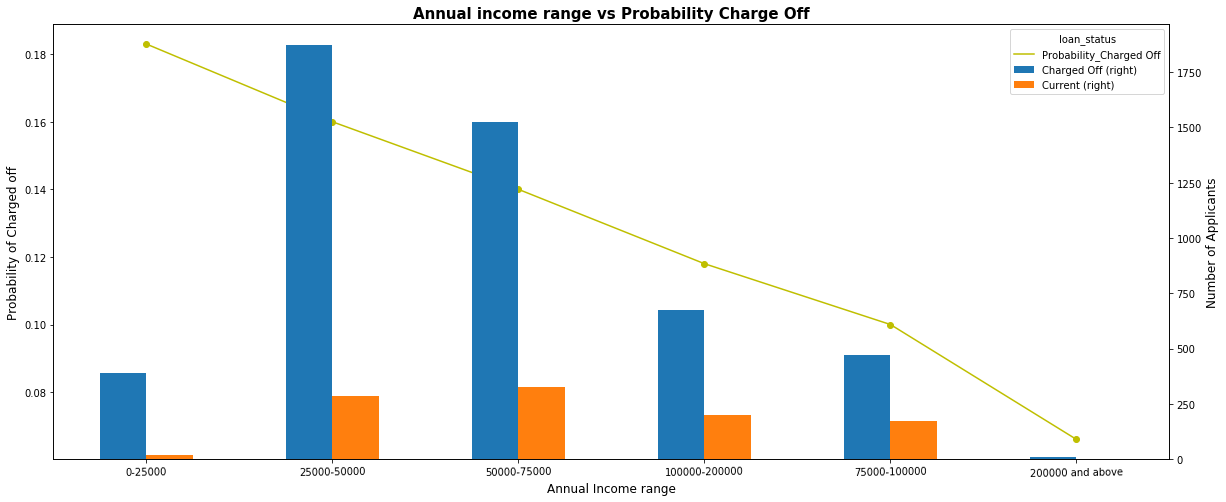

In [390]:
#The probability of 'chargedoff' customers amoung the total customers in each range of annual income
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular range of annual income
# into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['annual_inc_range'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab[['Probability_Charged Off']]      
barPlot =  crosstab.iloc[:,0:2]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True)
ax.set_title('Annual income range vs Probability Charge Off',fontsize=15,weight="bold")
ax.set_xlabel('Annual Income range',fontsize=12)
plt.xticks(rotation = 90)
ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.show()

Less salaried customers below 25000 USD are high defaulters

Text(0,0.5,'Frequency in %')

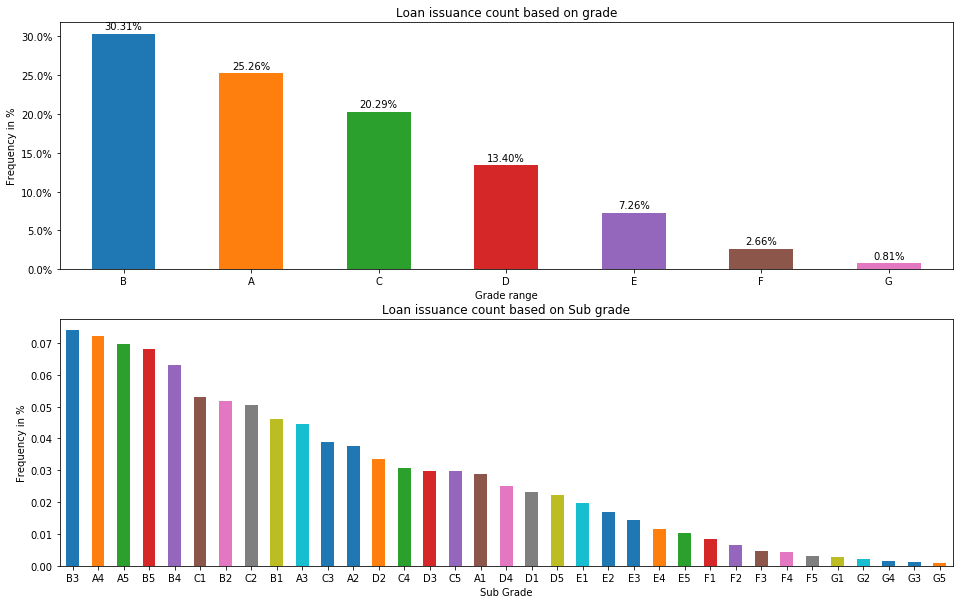

In [391]:
#counting loan issuance for each grade
figure = plt.figure(figsize=(16,10))
plt.subplot2grid((2,1),(0,0))
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.grade.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan issuance count based on grade')
plt.xlabel('Grade range')
plt.ylabel('Frequency in %')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    
#loan issuance count for each sub grade
plt.subplot2grid((2,1),(1,0))
#ax =sns.countplot(x='purpose',data = df_loan)
ax =df_loan.sub_grade.value_counts(normalize =True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Loan issuance count based on Sub grade')
plt.xlabel('Sub Grade')
plt.ylabel('Frequency in %')


Text(0.5,0,'Subgrade')

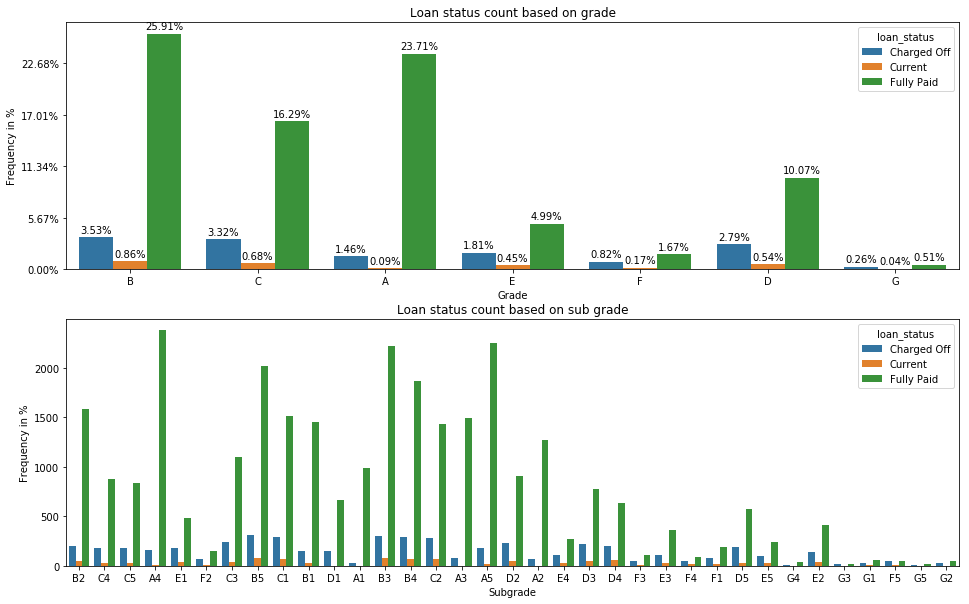

In [392]:
#counting each loan status category for each grade
#chargedoffstatus = df_loan.loc[df_loan.loan_status =='Charged Off']
figure = plt.figure(figsize=(16,10))
plt.subplot2grid((2,2),(0,0),colspan =2)

ax =sns.countplot(x='grade', hue ='loan_status', data = df_loan)
#ax =xx.grade.value_counts(normalize =True).plot(kind='bar')
plt.title('Loan status count based on grade')
plt.ylabel('Frequency in %')
plt.xlabel('Grade')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))   
ax.set_yticklabels(map('{:1.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/len(df_loan)))

for bar in ax.patches:
    height = bar.get_height()
    height =np.nan_to_num(height)
    label_position = float(height + (y_height * 0.01))     
    ax.text(float(bar.get_x() + bar.get_width()/2.), label_position,'{:1.2f}%'.format((height/len(df_loan))*100),ha='center', va='bottom') 
    
#counting each loan status category for each subgrade    
plt.subplot2grid((2,2),(1,0),colspan =2)
ax =sns.countplot(x='sub_grade', hue ='loan_status', data = df_loan)
#ax =xx.grade.value_counts(normalize =True).plot(kind='bar')
plt.title('Loan status count based on sub grade')
plt.ylabel('Frequency in %')
plt.xlabel('Subgrade')

Grade B, C and then D has more charged off among total number of loan issuance. but each grade loan issuance charged off is more in G. 

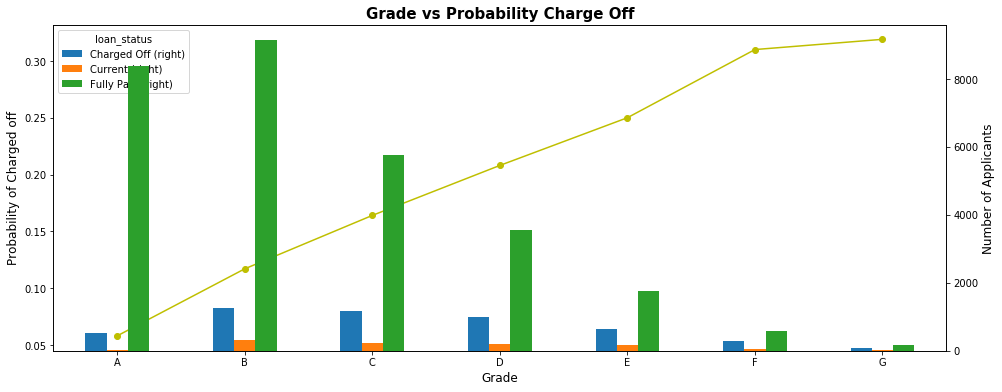

In [393]:
#The probability of 'chargedoff' customers amoung the total customers in each types of grade
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular grade
#category into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['grade'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab['Probability_Charged Off']  
barPlot =  crosstab.iloc[:,0:3]
ax = linePlot.plot(figsize=(16,6), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True)
ax.set_title('Grade vs Probability Charge Off',fontsize=15,weight="bold")
ax.set_xlabel('Grade',fontsize=12)
plt.xticks(rotation = 90)
ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.show()



Grade A has low probability of charged off,it gradually increase the proabability of charged off towards G

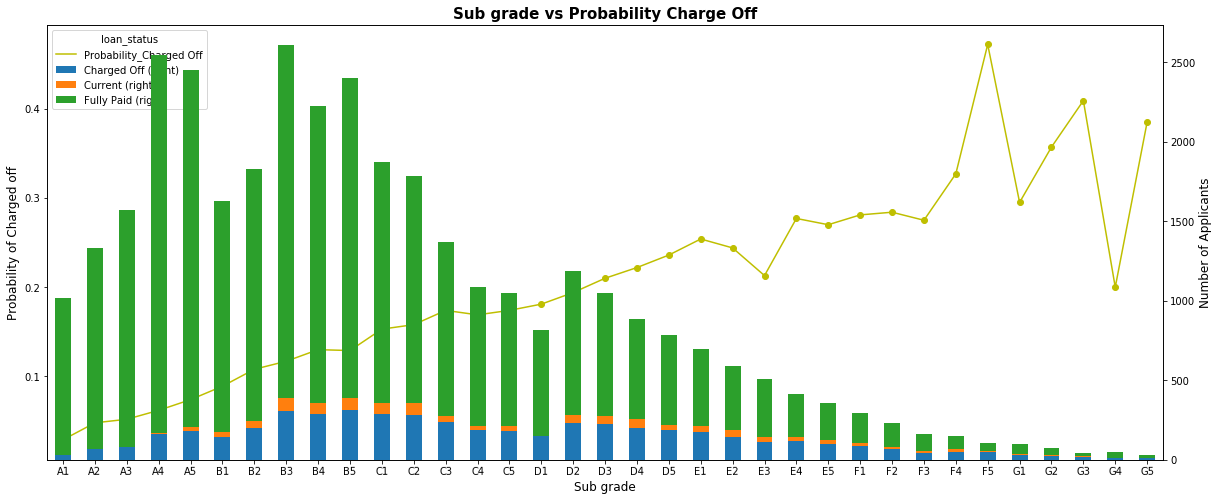

In [394]:
#The probability of 'chargedoff' customers amoung the total customers in each types of sub grade
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular sub grade
#category into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['sub_grade'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab[['Probability_Charged Off']]      
barPlot =  crosstab.iloc[:,0:3]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('Sub grade vs Probability Charge Off',fontsize=15,weight="bold")
ax.set_xlabel('Sub grade',fontsize=12)
plt.xticks(rotation = 90)
ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.show()

It is gradually increasing the probability of charged off from A1 to G5. In F5 it shows high probability of charged off and G4 the probability of charged off is lower than E grade.

In [272]:
loan_correlation = df_loan.corr()
loan_correlation

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate(%),installment,annual_inc,dti,delinq_2yrs,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_income_ratio
id,1.000000,0.993591,0.139768,0.149895,0.247796,0.075255,0.083432,0.030790,0.090661,-0.011319,...,0.136965,0.218132,0.108602,0.170421,-0.047354,0.033093,-0.013067,0.120367,-0.005712,0.098479
member_id,0.993591,1.000000,0.138862,0.148092,0.256366,0.070421,0.077768,0.031333,0.091224,-0.010721,...,0.137057,0.226802,0.108703,0.170930,-0.050316,0.031413,-0.014759,0.121790,-0.003820,0.096840
loan_amnt,0.139768,0.138862,1.000000,0.981029,0.939159,0.317741,0.926927,0.416271,0.079821,-0.033514,...,0.882356,0.850142,0.845441,0.726840,0.054573,0.136809,0.072608,0.440112,-0.039885,0.623098
funded_amnt,0.149895,0.148092,0.981029,1.000000,0.957856,0.321658,0.953832,0.411442,0.079436,-0.033797,...,0.899043,0.866645,0.863824,0.734547,0.057174,0.137986,0.074974,0.444714,-0.040795,0.610902
funded_amnt_inv,0.247796,0.256366,0.939159,0.957856,1.000000,0.314729,0.902168,0.393944,0.085786,-0.040095,...,0.877422,0.909748,0.839923,0.727822,0.036263,0.125407,0.061010,0.434721,-0.040084,0.581634
int_rate(%),0.075255,0.070421,0.317741,0.321658,0.314729,1.000000,0.290380,0.077048,0.115866,0.154332,...,0.315603,0.310476,0.190980,0.537896,0.097388,0.124470,0.067758,0.158631,0.085974,0.225728
installment,0.083432,0.077768,0.926927,0.953832,0.902168,0.290380,1.000000,0.414968,0.066992,-0.020679,...,0.851127,0.811653,0.843925,0.628297,0.066422,0.119611,0.076037,0.391637,-0.036281,0.558956
annual_inc,0.030790,0.031333,0.416271,0.411442,0.393944,0.077048,0.414968,1.000000,-0.116087,0.025893,...,0.395041,0.380279,0.398308,0.279039,0.021232,0.036654,0.019901,0.215841,-0.017182,-0.317832
dti,0.090661,0.091224,0.079821,0.079436,0.085786,0.115866,0.066992,-0.116087,1.000000,-0.036735,...,0.078808,0.083944,0.054936,0.116625,-0.011201,0.025056,0.010830,0.013493,0.002276,0.151674
delinq_2yrs,-0.011319,-0.010721,-0.033514,-0.033797,-0.040095,0.154332,-0.020679,0.025893,-0.036735,1.000000,...,-0.024529,-0.031337,-0.041012,0.022259,0.034426,0.012292,0.015016,-0.015930,0.003174,-0.060836


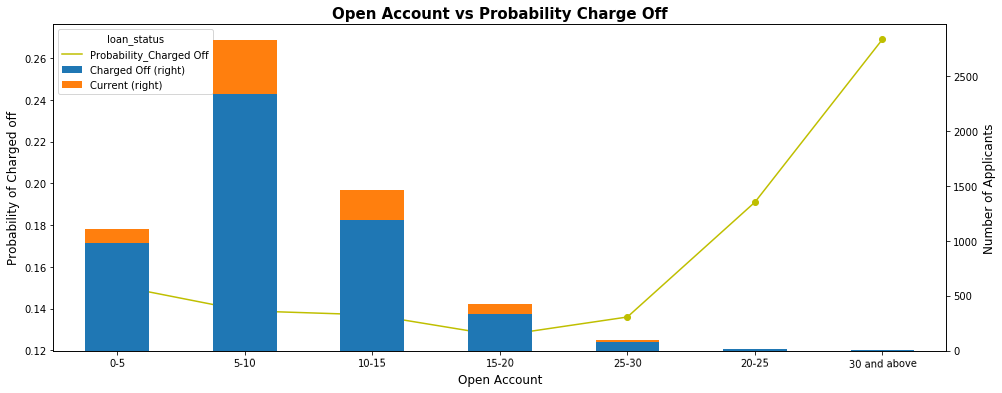

In [395]:
#The probability of 'chargedoff' customers amoung the total customers in each number of open account
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular number of open account
# into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['open_acc_range'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab[['Probability_Charged Off']]      
barPlot =  crosstab.iloc[:,0:2]
ax = linePlot.plot(figsize=(16,6), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('Open Account vs Probability Charge Off',fontsize=15,weight="bold")
ax.set_xlabel('Open Account',fontsize=12)
plt.xticks(rotation = 90)
ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.show()

Number of open account which leads to high probability of charged off

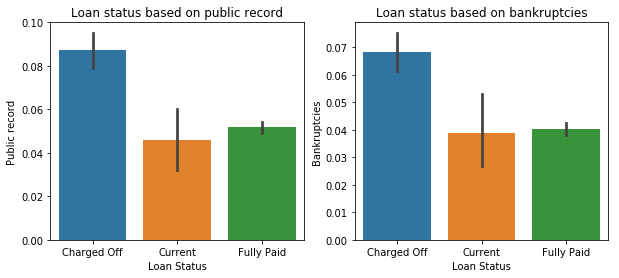

In [396]:
#counting each loan status category for customers derogatory records 
plt.figure(figsize=(10,4))
plt.subplot2grid((1,2),(0,0))
sns.barplot(x='loan_status',y='pub_rec',data=df_loan)
plt.xlabel("Loan Status")
plt.ylabel('Public record')
plt.title('Loan status based on public record')
plt.subplot2grid((1,2),(0,1))
sns.barplot(x='loan_status',y='pub_rec_bankruptcies', data=df_loan)
plt.title('Loan status based on bankruptcies')
plt.ylabel('Bankruptcies')
plt.xlabel("Loan Status")
plt.show()

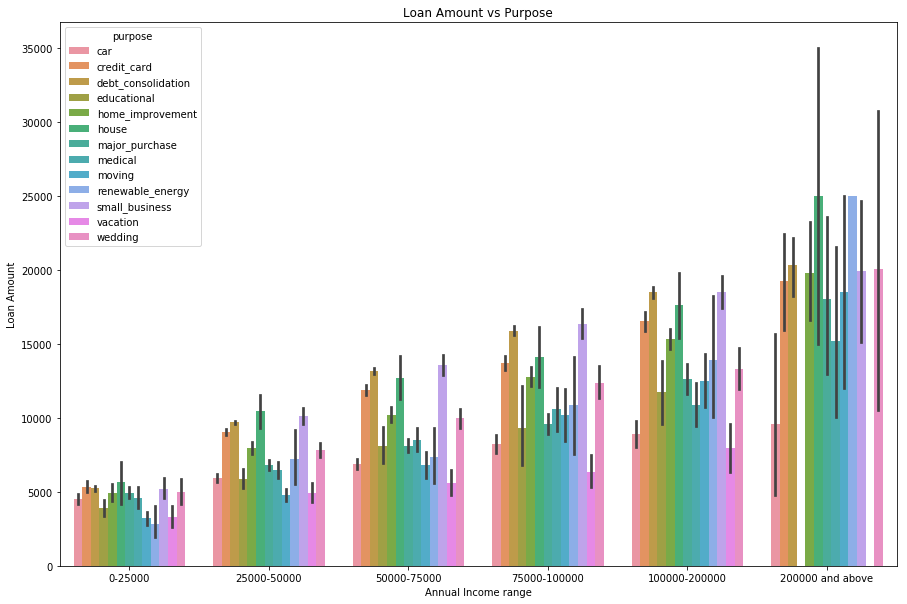

In [397]:
#counting the number of record for loan amount and it's purpose based on loan status
plt.figure(figsize=(15,10))
sns.barplot(x='annual_inc_range',y='loan_amnt',hue='purpose',data=df_loan)
plt.xlabel("Annual Income range")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Purpose")
plt.show()

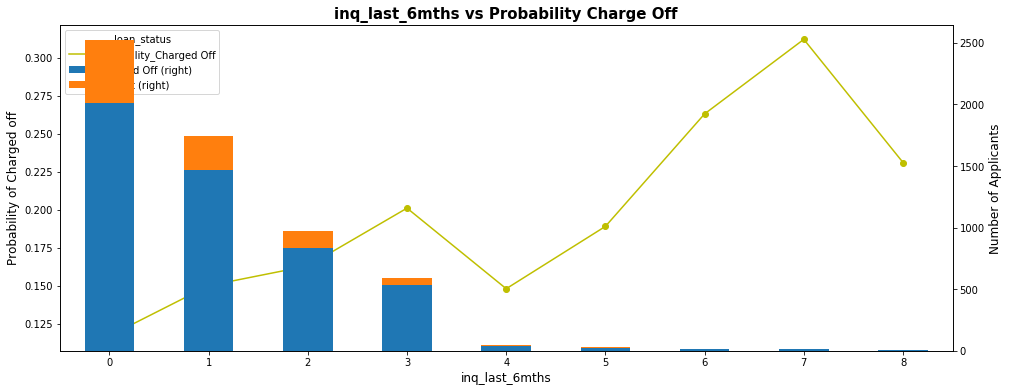

In [399]:
#The probability of 'chargedoff' customers amoung the total customers in number of hard enquiries
#is visualized
#Line plot displays the probability of 'charged off' while
#boxplot depicts the bifurcation of the total number of loans of particular number of hard enquires
#category into its different 'loan status'(charged off,fullypaid, current).
crosstab = pd.crosstab(df_loan['inq_last_6mths'], df_loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
crosstab
linePlot = crosstab[['Probability_Charged Off']]      
barPlot =  crosstab.iloc[:,0:2]
ax = linePlot.plot(figsize=(16,6), marker='o',color = 'y')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('inq_last_6mths vs Probability Charge Off',fontsize=15,weight="bold")
ax.set_xlabel('inq_last_6mths',fontsize=12)
plt.xticks(rotation = 90)
ax.set_ylabel('Probability of Charged off',fontsize=12)
ax2.set_ylabel('Number of Applicants',fontsize=12)
plt.show()

More number of hard inquries causes more probability of charged off.

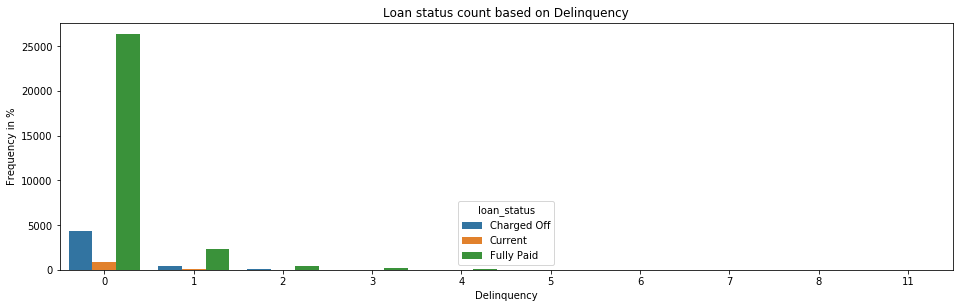

In [400]:
#counting each loan status category based on numberr of delinquency in past 2 years
figure = plt.figure(figsize=(16,10))
plt.subplot2grid((2,2),(0,0),colspan =2)

ax =sns.countplot(x='delinq_2yrs', hue ='loan_status', data = df_loan)
#ax =xx.grade.value_counts(normalize =True).plot(kind='bar')
plt.title('Loan status count based on Delinquency')
plt.ylabel('Frequency in %')
plt.xlabel('Delinquency')
#(y_bottom, y_top) = ax.get_ylim()
#y_height = y_top - y_bottom
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))   
#ax.set_yticklabels(map('{:1.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/len(df_loan)))

for bar in ax.patches:
    height = bar.get_height()
    height =np.nan_to_num(height)
    label_position = float(height + (y_height * 0.01))     
    #ax.text(float(bar.get_x() + bar.get_width()/2.), label_position,'{:1.2f}%'.format((height/len(df_loan))*100),ha='center', va='bottom') 


As delinquency count increase, the issuance of loans were very less. For more than 4 delinquency count, the loan issuance count is one or two.

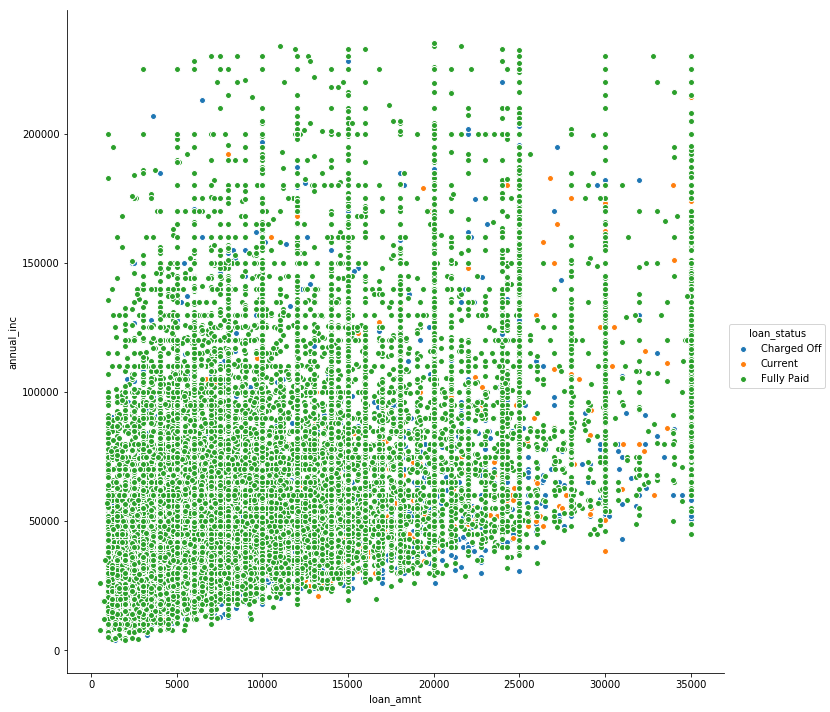

In [405]:
#plot the loan details for loan amount, annual income for each category of loan status 
sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=df_loan, hue="loan_status", size=10)
plt.show()

maximum charged off in between below 50000usd salaried customers and loan amount below 10000 usd. A strange insight being very few high salaried customers took 5000, 10000usd loan amount and became defaulters.

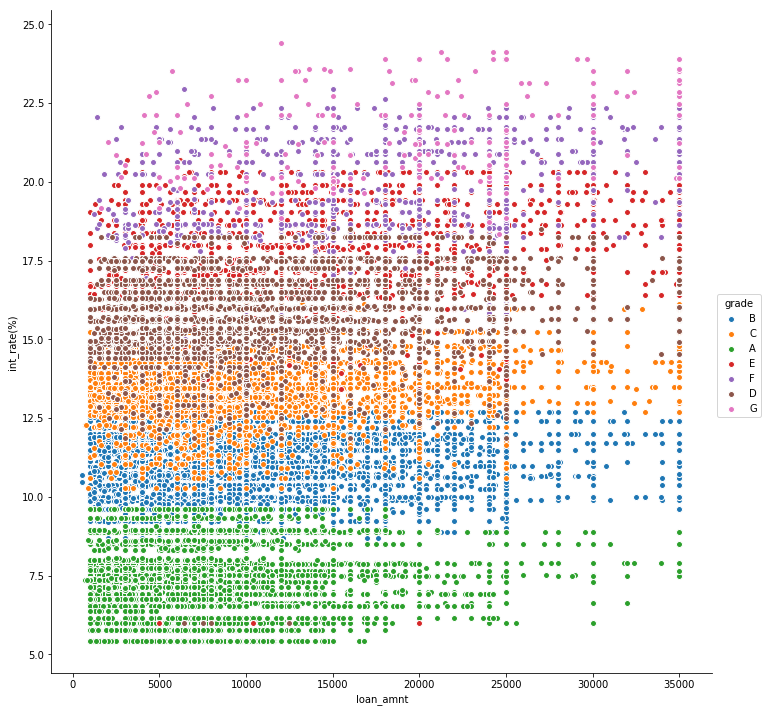

In [404]:
#plot the loan details for loan amount, interest rate for each category of grade 
sns.pairplot(x_vars=["loan_amnt"], y_vars=["int_rate(%)"], data=df_loan, hue="grade", size=10)
plt.show()

For Top Grade A,B,C the company LC is giving loan with less interest rate. and loan issued with high interest rate for  non-collectible grade i.e Grade G 

<Figure size 1080x3240 with 0 Axes>

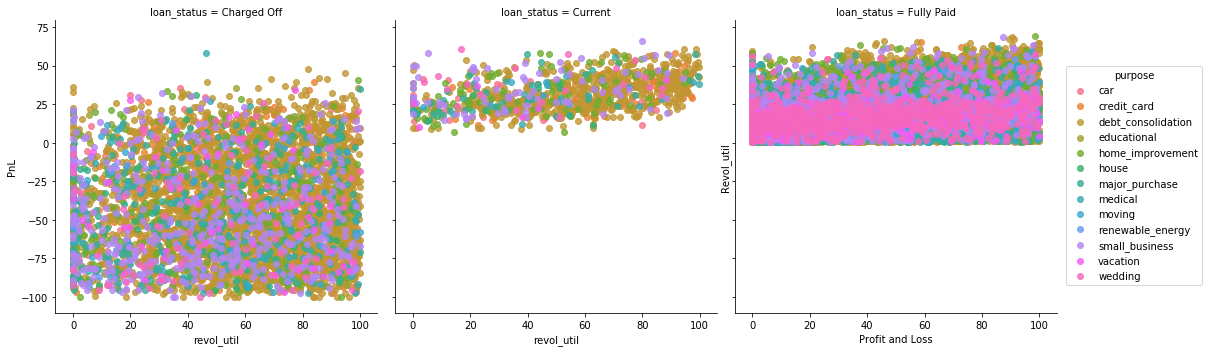

In [403]:
# finding profil or loss for each types of loans based on revolving balance utilization rate
df_loan['PnL']=round((df_loan['total_pymnt']-df_loan['funded_amnt'])*100/df_loan['funded_amnt'],2)
df_loan.revol_util = df_loan.revol_util.str.rstrip('%').astype('float')
#Based on the loan status the Revol_util is  profit or loss
plt.figure(figsize=(15,45))
sns.lmplot(x='revol_util',y='PnL',col='loan_status',hue='purpose',fit_reg=False,data=df_loan)
plt.ylabel("Revol_util")
plt.xlabel("Profit and Loss")
plt.show()

In [406]:
#loss occured by defaulted loans
xx=df_loan.loc[df_loan.loan_status =='Charged Off'] 
100*((sum(xx['total_pymnt'])-sum(xx['funded_amnt']))/sum(xx['funded_amnt']))

-41.69590661138438

41.70% of the funded amount towards the defaulters has to be recovered.

In [407]:
#Profit occured by remitted loan
xx=df_loan.loc[df_loan.loan_status =='Fully Paid'] 
100*((sum(xx['total_pymnt'])-sum(xx['funded_amnt']))/sum(xx['funded_amnt']))

19.914650786805986

19.91% of the funded amount towards the customers who has paid completed without due is the profit to the investors and LC